# Data Cleaning

In [1]:
# pip install ppscore

In [2]:
# pip install catboost

In [3]:
# pip install shap

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import ppscore as pps
import scipy.stats as st

pd.set_option('display.max_columns',None)
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv('/content/drive/MyDrive/loan_data_2007_2014.csv')

## Handle Missing Value

In [7]:
df.sample(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
322189,322189,24605906,27038771,25150,25150,25150.0,60 months,22.15,696.77,E,E5,Teacher,9 years,MORTGAGE,75000.0,Source Verified,Aug-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,206xx,MD,15.39,0.0,Oct-04,0.0,NaN,NaN,7.0,0.0,25508,92.8,19.0,w,20555.48,20555.48,11845.090000,11845.09,4594.52,7250.57,0.0,0.0,0.0,Jan-16,696.77,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,270179.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27500.0,NaN,NaN,NaN
398118,398118,15380712,17453133,6000,6000,6000.0,36 months,7.62,186.97,A,A3,Patient Accounts Manager,10+ years,MORTGAGE,59000.0,Not Verified,May-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,494xx,MI,19.22,0.0,Nov-97,0.0,NaN,NaN,14.0,0.0,8740,54.0,41.0,w,0.00,0.00,6214.299503,6214.30,6000.00,214.30,0.0,0.0,0.0,Nov-14,5279.45,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,217442.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16200.0,NaN,NaN,NaN
238232,238232,36230849,38942229,8000,8000,8000.0,36 months,15.59,279.64,D,D1,Direct Social Worker,3 years,RENT,36000.0,Not Verified,Dec-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,706xx,LA,19.77,0.0,Sep-11,0.0,NaN,NaN,5.0,0.0,4422,51.4,11.0,f,5529.00,5529.00,3628.390000,3628.39,2471.00,1157.39,0.0,0.0,0.0,Jan-16,279.64,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,23485.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8600.0,NaN,NaN,NaN
62005,62005,8984737,6488293,12000,12000,12000.0,36 months,10.99,392.81,B,B2,RN,10+ years,MORTGAGE,58000.0,Verified,Nov-13,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,553xx,MN,9.93,0.0,Jun-00,0.0,79.0,NaN,13.0,0.0,14825,48.4,23.0,f,4093.17,4093.17,9819.350000,9819.35,7906.83,1912.52,0.0,0.0,0.0,Dec-15,392.81,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,286208.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30637.0,NaN,NaN,NaN
317970,317970,25337352,27780118,7000,7000,7000.0,36 months,24.50,276.48,F,F3,Associate Director,10+ years,MORTGAGE,53760.0,Verified,Sep-14,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,112xx,NY,10.25,0.0,Feb-07,2.0,28.0,NaN,25.0,0.0,12789,32.1,27.0,f,0.00,0.00,1382.400000,1382.40,695.65,686.75,0.0,0.0,0.0,Feb-15,276.48,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,292428.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39900.0,NaN,NaN,NaN


In [8]:
df.shape

(466285, 75)

In [9]:
with pd.option_context('display.max_rows', None,):
    print(df.isnull().sum())

Unnamed: 0                          0
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       27588
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           340302
purpose                             0
title                              20
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs 

In [10]:
drop = ['id','member_id','annual_inc_joint', 'dti_joint','open_acc_6m','open_il_6m',
       'open_il_12m','open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util','open_rv_12m','open_rv_24m','all_util','inq_fi',
       'total_cu_tl','inq_last_12m','desc','mths_since_last_record',
        'mths_since_last_record','max_bal_bc','Unnamed: 0','emp_title',
        'verification_status_joint','url', 'title',
        'mths_since_last_major_derog','next_pymnt_d',
       'policy_code','zip_code','mths_since_last_delinq']
df.drop(drop,1,inplace=True)

In [11]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,466256.000000,3.960090e+05,3.960090e+05,3.960090e+05
mean,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,0.004002,1.919135e+02,1.388017e+05,3.037909e+04
std,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,0.068637,1.463021e+04,1.521147e+05,3.724713e+04
min,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,0.000000,0.000000e+00,2.861800e+04,1.350000e+04
50%,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,0.000000,0.000000e+00,8.153900e+04,2.280000e+04
75%,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,0.000000,0.000000e+00,2.089530e+05,3.790000e+04
max,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,33.000000,84.000000,63.000000,2.568995e+06,892.300000,156.000000,32160.380000,32160.380000,57777.579870,57777.580000,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,36234.440000,20.000000,5.000000,9.152545e+06,8.000078e+06,9.999999e+06


In [12]:
df.describe(include='object')

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
count,466285,466285,466285,445277,466285,466285,466285,466285,466285,466285,466285,466256,466285,465909,466243,466285
unique,2,7,35,11,6,3,91,9,2,14,50,664,2,98,103,1
top,36 months,B,B3,10+ years,MORTGAGE,Verified,Oct-14,Current,n,debt_consolidation,CA,Oct-00,f,Jan-16,Jan-16,INDIVIDUAL
freq,337953,136929,31686,150049,235875,168055,38782,224226,466276,274195,71450,3674,303005,179620,327699,466285


In [13]:
# Drop Column Again

drop = ['pymnt_plan', 'application_type','sub_grade',
        'recoveries', 'collection_recovery_fee', 
        'total_rec_prncp', 
        'total_rec_late_fee']
df.drop(drop,1,inplace=True)

#Only 15% data still has null value, we drop that rows
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_int                 0
last_pymnt_d                  0
last_pym

In [15]:
df.shape

(376571, 38)

Kriteria penghapusan fitur:

- Fitur yang memiliki missing value > 50%
- Fitur yang digunakan untuk memprediksi nilai di masa depan (contoh: pembayaran selanjutnya)
- Fitur kategorikal yang memiliki unique value > 7
- Fitur yang memiliki 1 unique value
- Fitur yang memiliki informasi hampir sama (Grade dan Sub-Grade)
- Baris yang memiliki null value (sekitar 15% dari dataset)


## Handle Column Value

In [16]:
#Loan Status
df.loan_status.unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'Late (16-30 days)',
       'Charged Off', 'In Grace Period', 'Default'], dtype=object)

In [17]:
df['credit_score'] = np.where(df.loc[:, 'loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)',
                                    'Does not meet the credit policy. Status:Charged Off']), "Bad", "Good")
df.drop('loan_status',1,inplace = True)

In [18]:
# Emp_Length
df.emp_length.unique()

array(['10+ years', '1 year', '2 years', '4 years', '3 years', '7 years',
       '5 years', '6 years', '9 years', '8 years', '< 1 year'],
      dtype=object)

In [19]:
df['emp_length'] = df['emp_length'].str.replace('\+ years', '')
df['emp_length'] = df['emp_length'].str.replace('< 1 year', str(0))
df['emp_length'] = df['emp_length'].str.replace(' years', '')
df['emp_length'] = df['emp_length'].str.replace(' year', '')
df['emp_length'] = pd.to_numeric(df['emp_length'])
df['emp_length'].fillna(0, inplace = True)

In [20]:
# Loan Amt & Funded Amt
df['loan-funded'] = df['loan_amnt'] - df['funded_amnt']
df['funded-inv'] = df['funded_amnt'] - df['funded_amnt_inv']
df['funded_reduced'] = np.where(df['loan-funded'] == 0,'No','Yes')
df['invest_reduced'] = np.where(df['funded-inv'] == 0,'No','Yes')

df.drop(['loan-funded','funded-inv'],1,inplace=True)

In [21]:
# preprocessing date cols 

def date_col(df, column):
    # store current month
    today_date = pd.to_datetime('2021-05-11')
    # convert to datetime format
    df[column] = pd.to_datetime(df[column], format = "%b-%y")
    # calculate the difference in months and add to a new column
    df['mths_since_' + column] = round(pd.to_numeric((today_date - df[column]) / np.timedelta64(1, 'M')))
    # make any resulting -ve values to be equal to the max date
    df['mths_since_' + column] = df['mths_since_' + column].apply(lambda x: df['mths_since_' + column].max() if x < 0 else x)
    # drop the original date column
    df.drop(columns = [column], inplace = True)
    

date_col(df, 'issue_d')
date_col(df, 'last_pymnt_d')
date_col(df, 'last_credit_pull_d')
date_col(df, 'earliest_cr_line')

Kolom yang dilakukan modifikasi terhadap value nya:

- Loan Status (mengubah menjadi target fitur baru)
- Employment Length (terdapat string) 
- Kolom berjenis 'Date' (menghitung jarak waktu dalam bulan)

## Correlation Features

In [22]:
# Function for deleting redundant features
def cekRedundan(df, treshold):
    redundan = [
                [],[],[]
                ]    
    
    for index, row in df.iterrows():
        for i in row.index.values:
            if (len(redundan[0]) == 0) | ((index+' - '+i not in redundan[2]) & (i+' - '+index not in redundan[2])) :
                nilai = df.loc[index,i]
                if (abs(nilai) >= treshold) & (nilai != 1.0) :
                    redundan[0].append(index)
                    redundan[1].append(i)
                    redundan[2].append(index + ' - ' + i)
                    
    for i in redundan[2]:
        print(i)

In [23]:
#Choose redundant features
cekRedundan(df.corr(),0.7)

loan_amnt - funded_amnt
loan_amnt - funded_amnt_inv
loan_amnt - installment
loan_amnt - total_pymnt
loan_amnt - total_pymnt_inv
loan_amnt - total_rec_int
funded_amnt - funded_amnt_inv
funded_amnt - installment
funded_amnt - total_pymnt
funded_amnt - total_pymnt_inv
funded_amnt - total_rec_int
funded_amnt_inv - installment
funded_amnt_inv - total_pymnt
funded_amnt_inv - total_pymnt_inv
funded_amnt_inv - total_rec_int
installment - total_pymnt
installment - total_pymnt_inv
revol_bal - total_rev_hi_lim
out_prncp - out_prncp_inv
total_pymnt - total_pymnt_inv


In [24]:
#Drop Redundant Feature
redundant = ['loan_amnt','funded_amnt','funded_amnt_inv','installment',
            'revol_bal','out_prncp_inv','total_pymnt_inv']
df.drop(redundant,1,inplace=True)

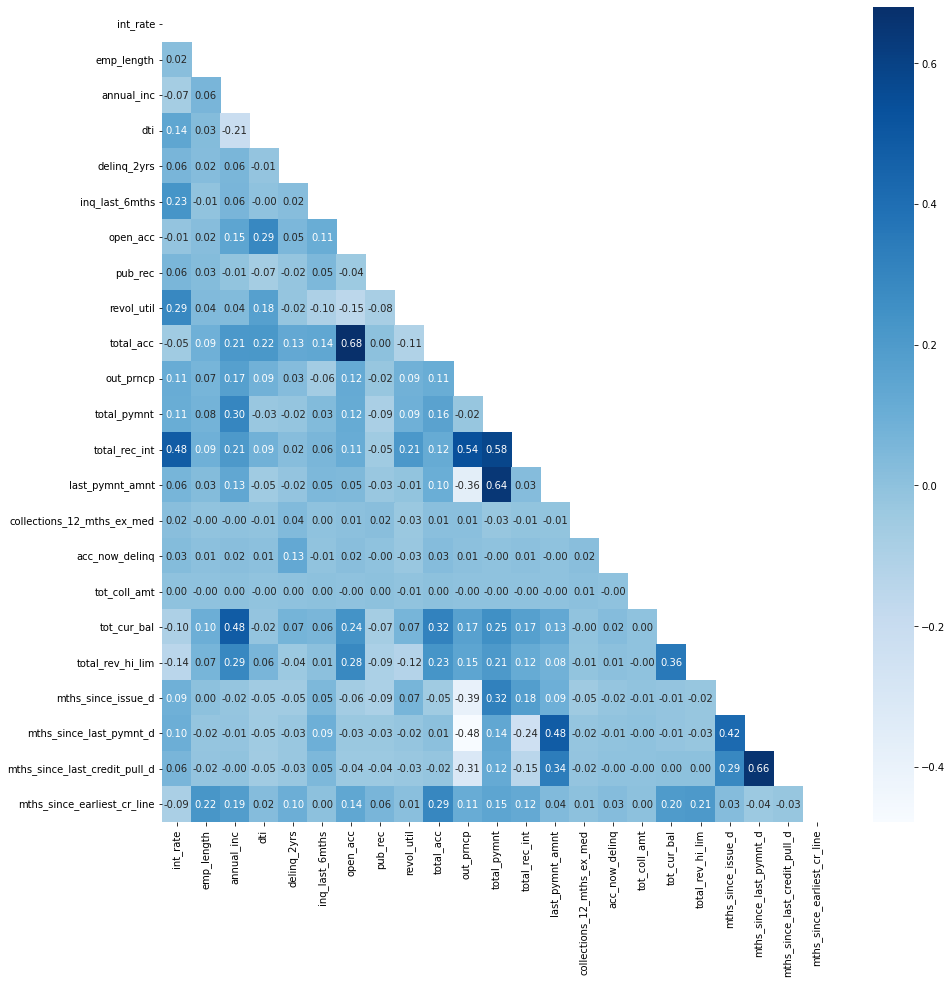

In [25]:
#Ploting features correlation with heatmap
mask = np.zeros_like(df.corr().fillna(0), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),mask=mask, cmap="Blues", annot=True, fmt='.2f')
plt.show()

**Menghapus kolom independen yang memiliki korelasi tinggi karena akan berpotensi menjadi fitur yang redundan dalam permodelan.:**

## Outliers

In [26]:
df.describe()

,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d,mths_since_earliest_cr_line
count,376571.000000,376571.000000,3.765710e+05,376571.000000,376571.000000,376571.000000,376571.000000,376571.000000,376571.000000,376571.000000,376571.000000,376571.000000,376571.000000,376571.000000,376571.000000,376571.000000,3.765710e+05,3.765710e+05,3.765710e+05,376571.000000,376571.000000,376571.000000,376571.000000
mean,14.039811,6.137939,7.526384e+04,17.673232,0.310512,0.776353,11.511726,0.174073,57.005921,25.597810,5190.664651,11455.719202,2638.869314,3227.995357,0.010622,0.004732,1.889280e+02,1.411113e+05,3.057076e+04,87.442105,68.906806,66.100164,279.985057
std,4.383931,3.617731,5.527046e+04,7.849406,0.837229,1.036977,5.037944,0.537996,22.939261,11.587732,6651.544467,8083.114285,2429.482955,5740.094974,0.117506,0.074705,1.499576e+04,1.533124e+05,3.769088e+04,7.420011,7.464134,5.200894,84.457919
min,6.000000,0.000000,4.000000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,35.690000,0.000000,0.010000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e+02,77.000000,64.000000,64.000000,114.000000
25%,10.990000,3.000000,4.700000e+04,11.770000,0.000000,0.000000,8.000000,0.000000,40.600000,17.000000,0.000000,5598.545000,1020.295000,324.195000,0.000000,0.000000,0.000000e+00,2.960400e+04,1.370000e+04,81.000000,64.000000,64.000000,223.000000
50%,13.980000,7.000000,6.500000e+04,17.280000,0.000000,0.000000,11.000000,0.000000,58.100000,24.000000,2346.130000,9379.800000,1896.710000,550.390000,0.000000,0.000000,0.000000e+00,8.464000e+04,2.300000e+04,86.000000,65.000000,64.000000,264.000000
75%,16.990000,10.000000,9.000000e+04,23.310000,0.000000,1.000000,14.000000,0.000000,74.800000,32.000000,8793.460000,15140.916360,3388.700000,3255.120000,0.000000,0.000000,0.000000e+00,2.120445e+05,3.810000e+04,93.000000,72.000000,64.000000,323.000000
max,26.060000,10.000000,7.500000e+06,39.990000,29.000000,8.000000,84.000000,63.000000,892.300000,156.000000,32160.380000,56087.909920,21840.000000,36234.440000,20.000000,5.000000,9.152545e+06,8.000078e+06,9.999999e+06,105.000000,104.000000,105.000000,628.000000


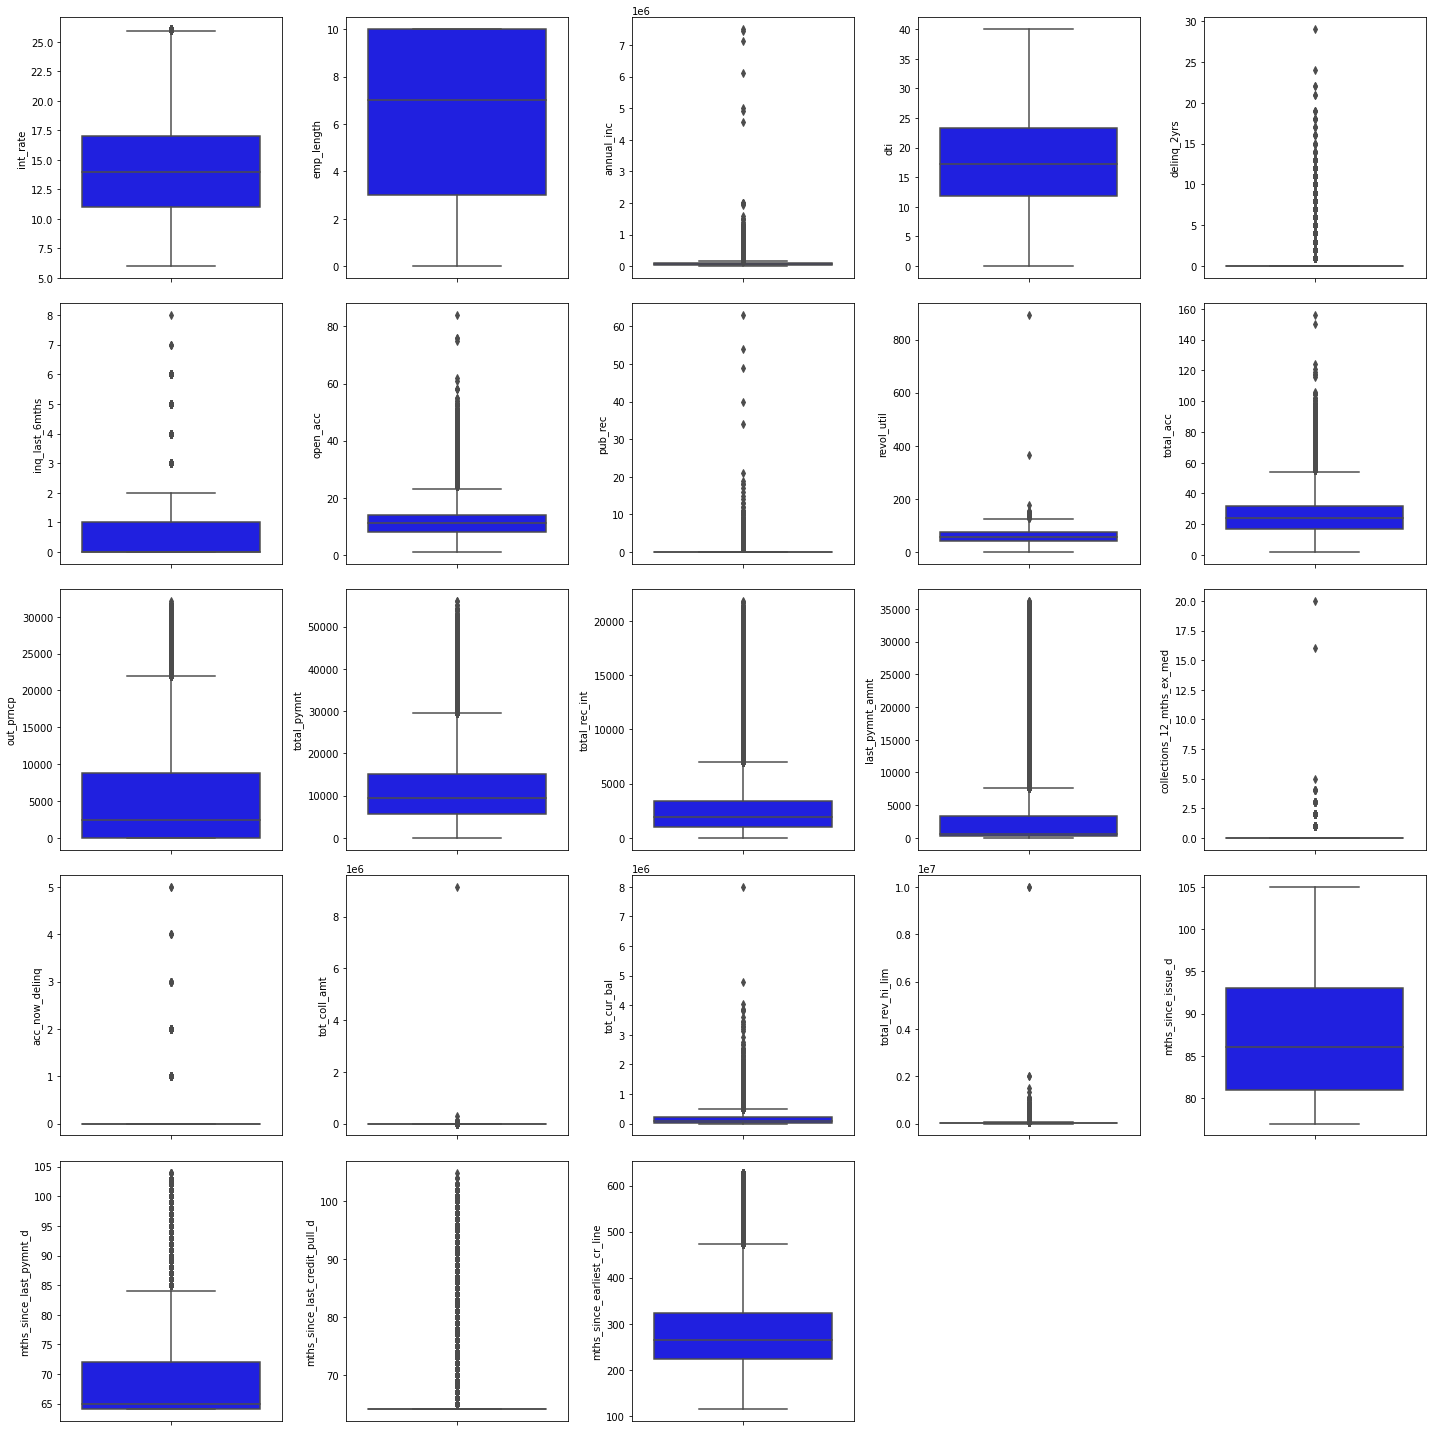

In [27]:
num_col = list(df.describe().columns)
plt.figure(figsize=(20,20))
for i in range(0, len(num_col)):
    plt.subplot(5, 5, i+1)
    sns.boxplot(y=df[num_col[i]], color='blue')
    plt.tight_layout()

In [28]:
#Delete outliers with Z Score method
df_outlier_clean = df.copy()

for i in num_col:
  z_scores = np.abs(st.zscore(df_outlier_clean[i]))
  filtered_entries = (z_scores < 3 )
  df_outlier_clean = df_outlier_clean[filtered_entries]

df_outlier_clean.shape

(283859, 33)

In [29]:
outliers = (df.shape[0] - df_outlier_clean.shape[0]) * 100 / df.shape[0]
print("Total outliers is",outliers,'%')

Total outliers is 24.620058368806944 %


**Dataset memiliki banyak sekali outliers, sehingga dilakukan penghapusan outliers tersebut yang memiliki proporsi keseluruhan sebesar 24.6%. Metode penghapusan dilakukan menggunakan Z Score.**

## PPS

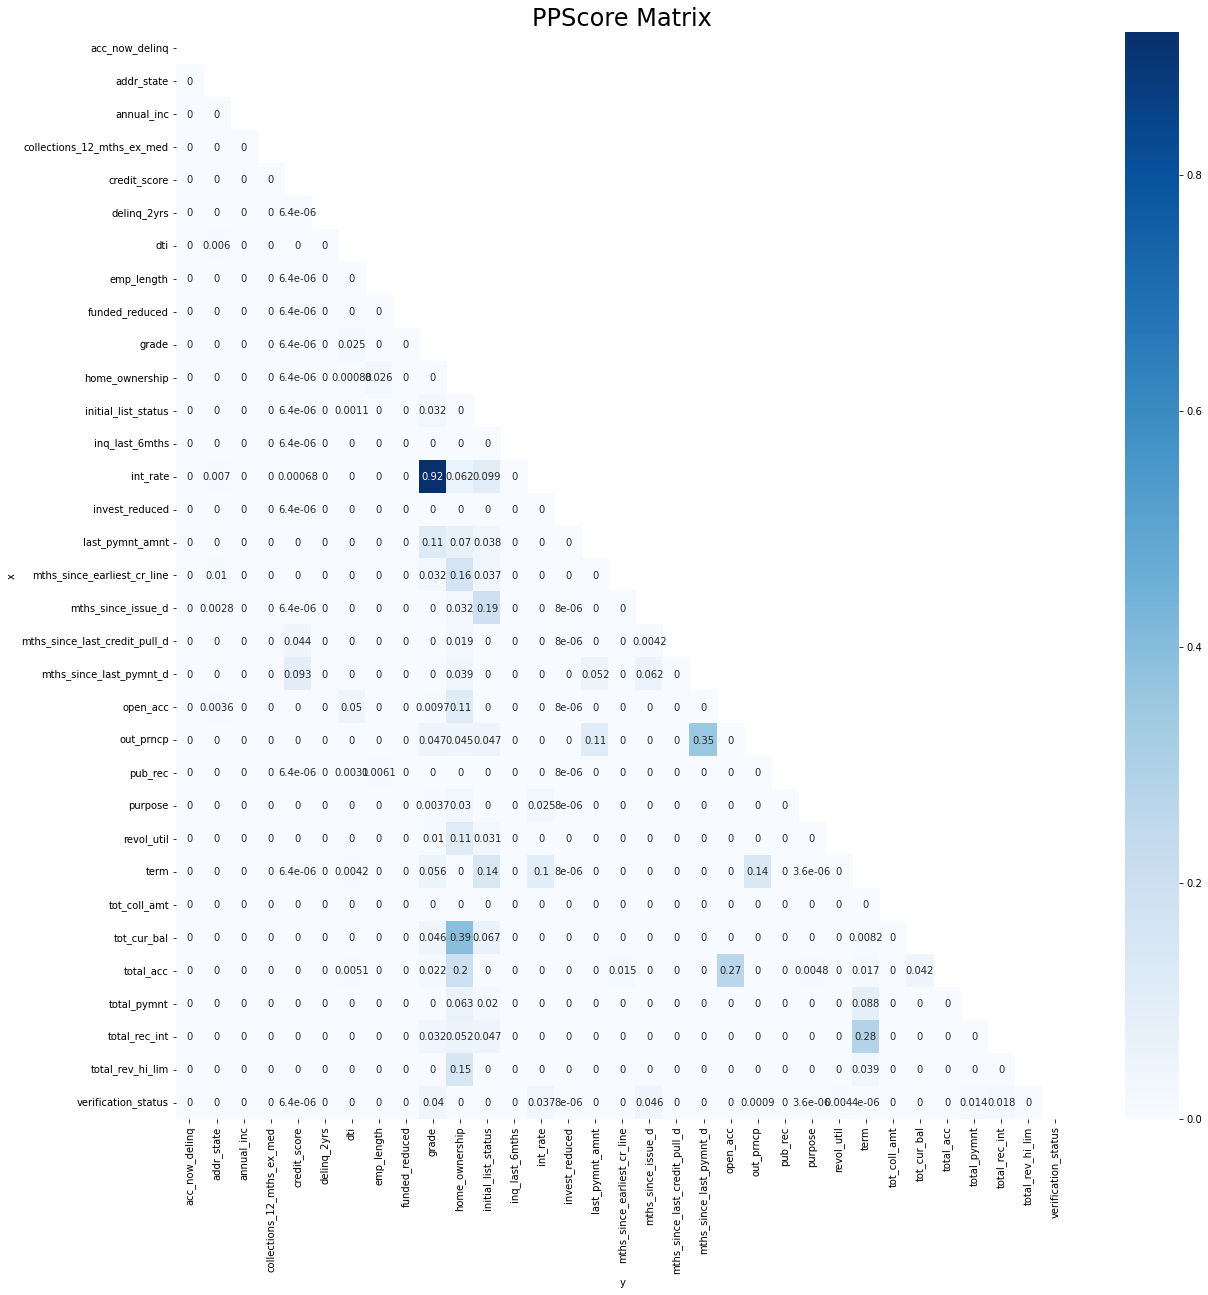

In [30]:
df_sample = df_outlier_clean.sample(1000)

matrix = pps.matrix(df_sample)
matrix = matrix.pivot('x','y','ppscore')

# Plot PPScore
mask = np.zeros_like(matrix.fillna(0), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,20))
sns.heatmap(data=matrix,mask=mask,
            annot=True, cmap='Blues')
plt.title('PPScore Matrix', fontsize=24)
plt.show()

In [31]:
select = ['delinq_2yrs','emp_length','funded_reduced','grade',
         'home_ownership','initial_list_status','inq_last_6mths',
          'invest_reduced','mths_since_issue_d','mths_since_last_credit_pull_d',
         'mths_since_last_pymnt_d','open_acc','pub_rec','purpose','term',
         'verification_status', 'credit_score']
df_select = df_outlier_clean[select].copy()
df_select.shape

(283859, 17)

**Fitur yang dipilih untuk permodelan dilakukan berdasarkan nilai Predictive Power Score. Fitur yang dipilih adalah fitur yang memiliki nilai PPS > 0.**

# EDA

## Univariate

In [32]:
df_select.head()

,delinq_2yrs,emp_length,funded_reduced,grade,home_ownership,initial_list_status,inq_last_6mths,invest_reduced,mths_since_issue_d,mths_since_last_credit_pull_d,mths_since_last_pymnt_d,open_acc,pub_rec,purpose,term,verification_status,credit_score
42535,0.0,10,No,B,OWN,w,0.0,No,89.0,65.0,64.0,14.0,0.0,debt_consolidation,36 months,Verified,Good
42536,0.0,1,No,C,RENT,f,0.0,No,89.0,64.0,64.0,12.0,0.0,debt_consolidation,36 months,Not Verified,Good
42537,0.0,10,No,A,MORTGAGE,w,1.0,No,89.0,64.0,64.0,12.0,0.0,debt_consolidation,36 months,Not Verified,Good
42539,0.0,2,No,A,MORTGAGE,w,0.0,No,89.0,64.0,64.0,8.0,0.0,debt_consolidation,36 months,Not Verified,Good
42540,0.0,10,No,B,MORTGAGE,f,1.0,No,89.0,64.0,64.0,9.0,0.0,debt_consolidation,36 months,Source Verified,Good


In [33]:
categorical = ['delinq_2yrs','funded_reduced','grade','home_ownership',
               'initial_list_status','invest_reduced','purpose','term',
               'verification_status','pub_rec',
               'inq_last_6mths']
numeric = ['emp_length','mths_since_issue_d','mths_since_last_pymnt_d',
           'open_acc','mths_since_last_credit_pull_d']
target = 'credit_score'
dual_pal = ["#a5a5b6","#121420"]
complete_pal= ['#dedee3','#a5a5b6','#737281','#403f4c','#2c2b3c',
       '#1b2432','#121420']

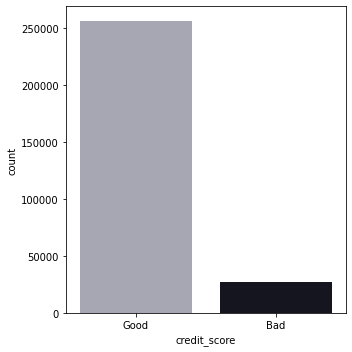

In [34]:
#Visualisasi data menggunakan countplot
plt.figure(figsize=(5,5))
sns.countplot(x=df_select[target], palette=dual_pal)
plt.tight_layout()

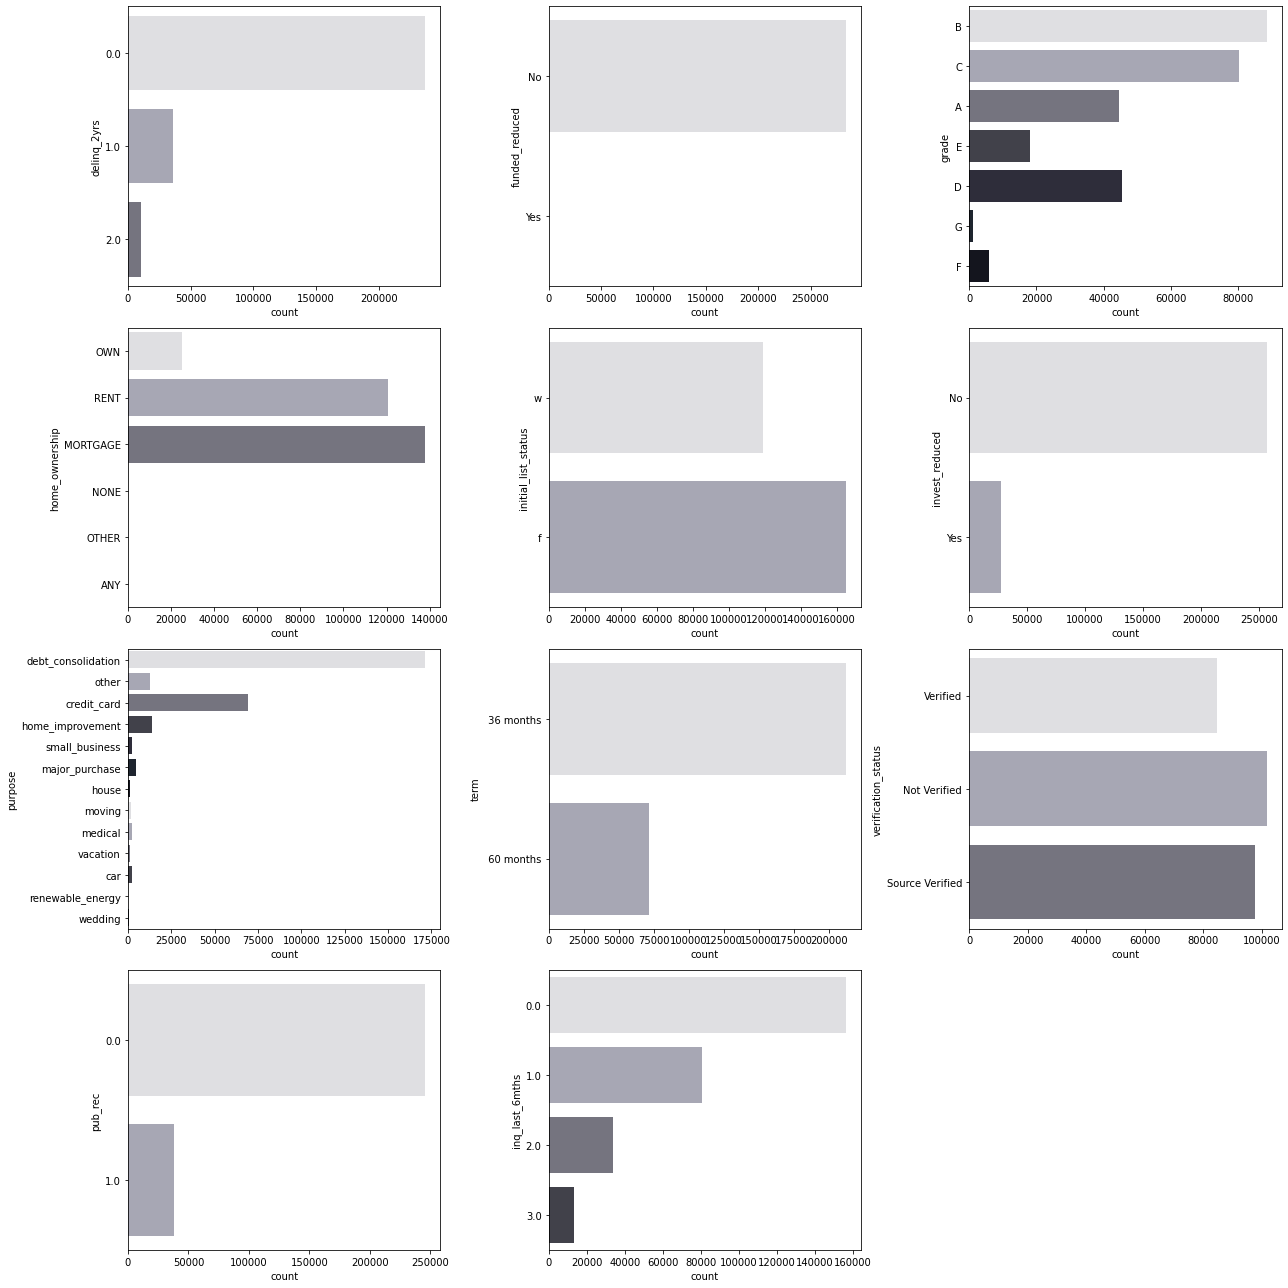

In [35]:
#Visualisasi data menggunakan countplot
plt.figure(figsize=(18,18))
for i in range(0, len(categorical)):
    plt.subplot(4, 3, i+1)
    sns.countplot(y=df_select[categorical[i]], palette=complete_pal)
    plt.tight_layout()

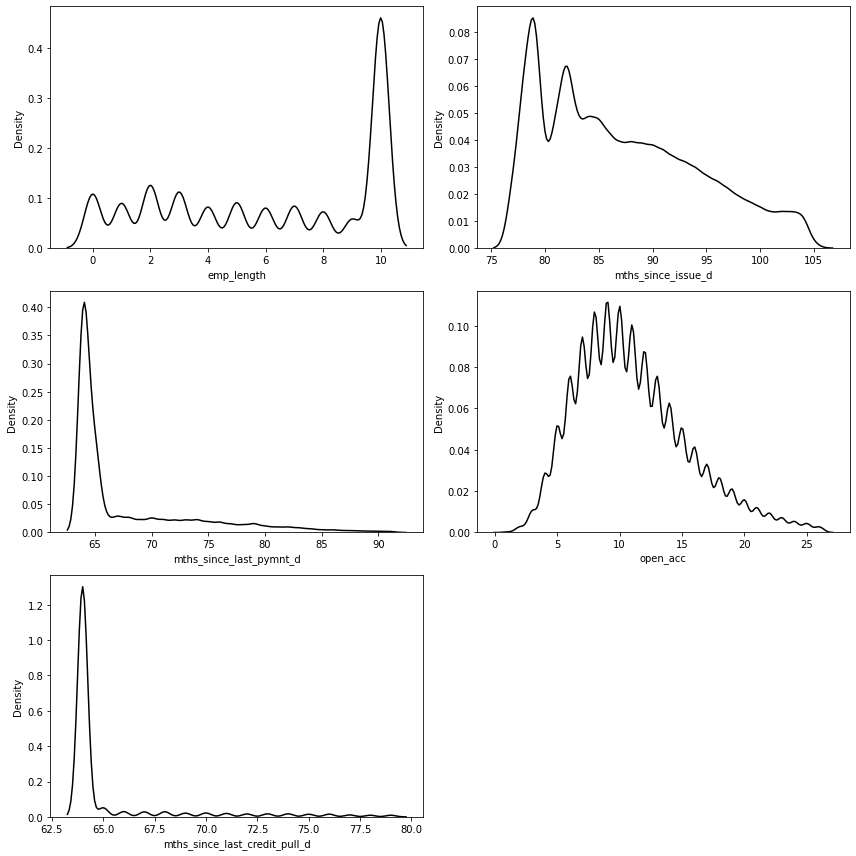

In [36]:
plt.figure(figsize=(12,12))
for i in range(0, len(numeric)):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(x=df_select[numeric[i]], color='black')
    plt.xlabel(numeric[i])
    plt.tight_layout()

Insights:
- Fitur Target (credit_score) memiliki jumlah nilai yang tidak seimbang (imbalance).
- Sebagian besar kredit memiliki kelas yang baik (A, B, C).
- Status pinjaman lebih banyak berjenis fractional dibandingkan whole loan
- Jangka waktu pinjaman 3 tahun lebih banyak dipilih dibandingkan jangka waktu 5 tahun.
- Alasan peminjaman yang paling mendominasi adalah konsolidasi hutang, yang berarti menggabungkan beberapa utang menjadi satu pembayaran bulanan dengan melunasinya dengan kartu kredit atau jenis pinjaman lain.


## Bivariate

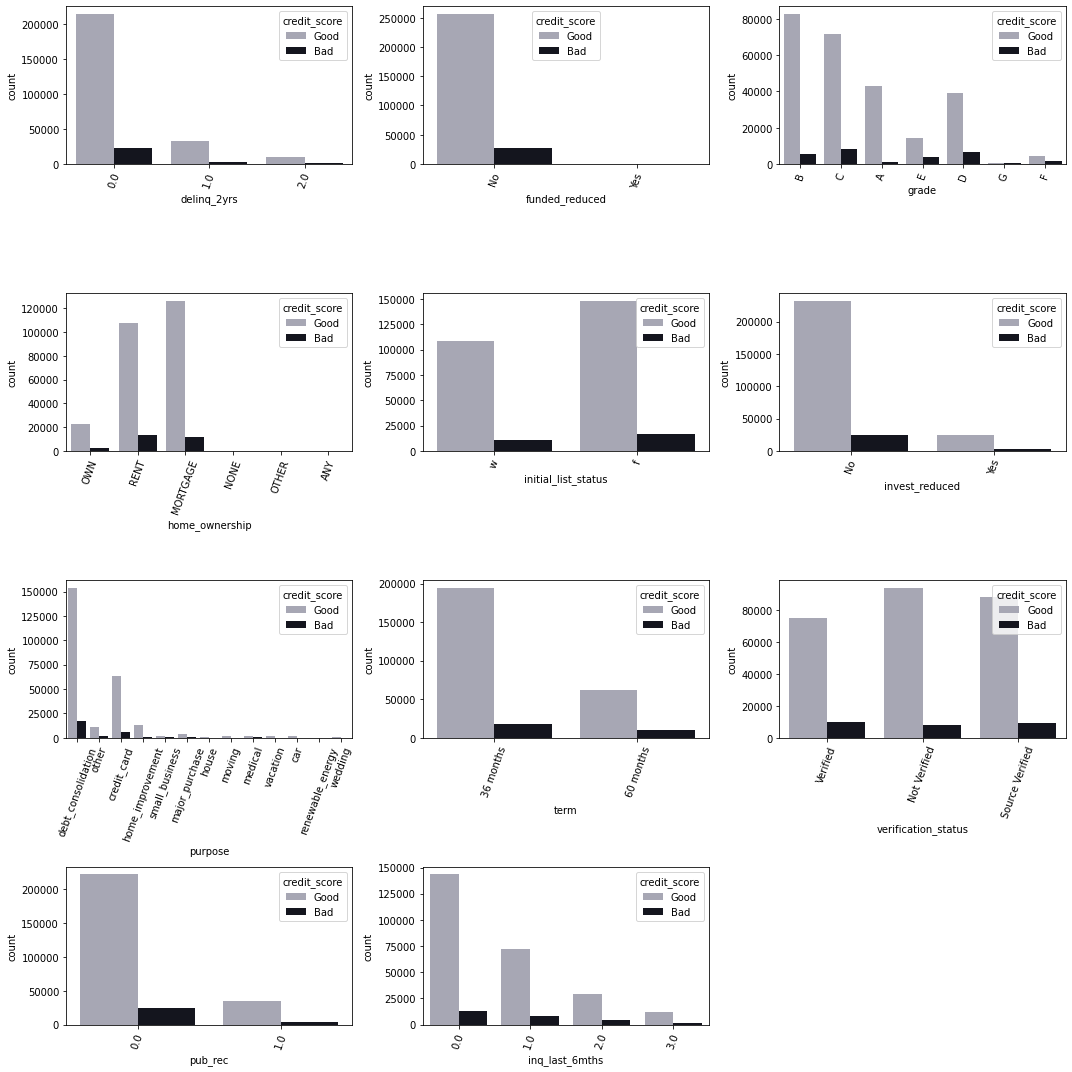

In [37]:
plt.figure(figsize=(15,15))
for i in range(0, len(categorical)):
    plt.subplot(4, 3, i+1) 
    sns.countplot(data=df_select, x=categorical[i], hue='credit_score', palette=dual_pal)
    plt.tight_layout()
    plt.xticks(rotation=70)

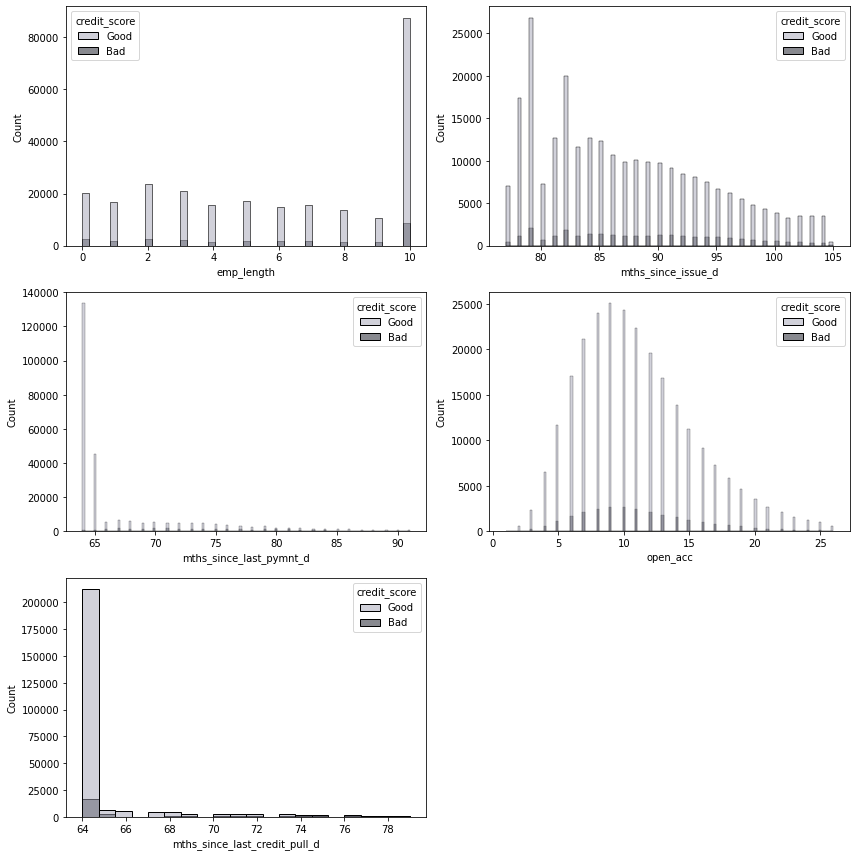

In [38]:
plt.figure(figsize=(12,12))
for i in range(0, len(numeric)):
    plt.subplot(3, 2, i+1) 
    sns.histplot(data=df_select, x=numeric[i], hue='credit_score', palette=dual_pal)
    plt.tight_layout()

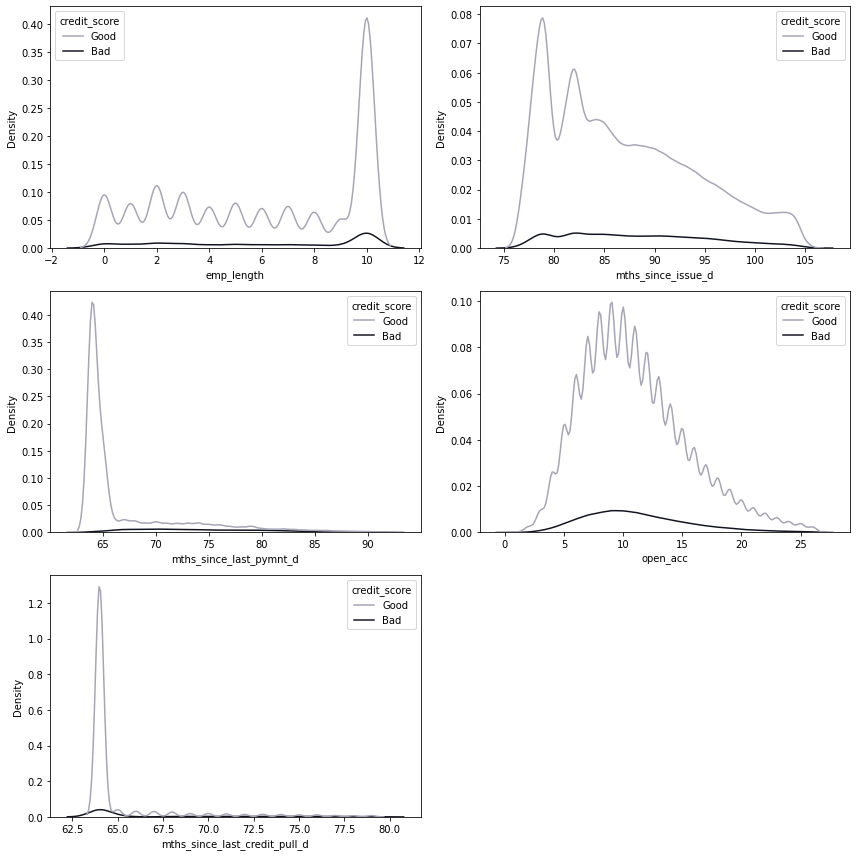

In [39]:
plt.figure(figsize=(12,12))
for i in range(0, len(numeric)):
    plt.subplot(3, 2, i+1) 
    sns.kdeplot(data=df_select, x=numeric[i], hue='credit_score', palette=dual_pal)
    plt.tight_layout()

## Bad Credit Percentage

In [40]:
def risk_pct_chart(x):
    ratio = (df_select.groupby(x)['credit_score']
         .value_counts(normalize=True)
         .mul(100)
         .rename('bad_pct')
         .reset_index())
    sns.lineplot(data=ratio[ratio['credit_score'] == 'Bad'], x=x, y='bad_pct', color='black')
    plt.title(x)
    plt.xticks(rotation=90)
    plt.show()

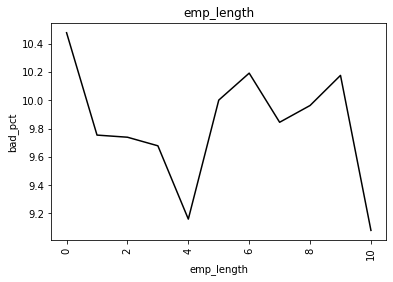

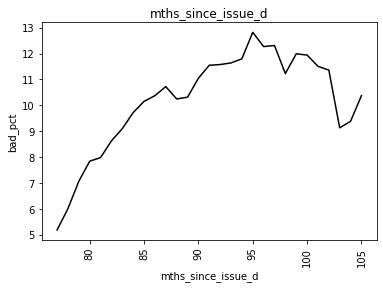

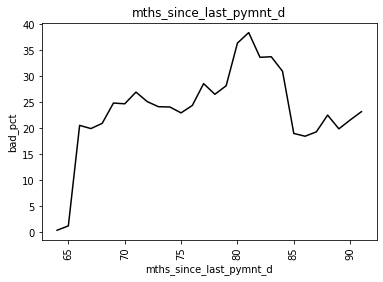

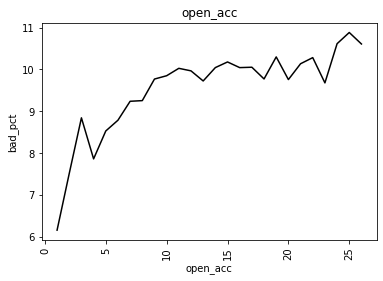

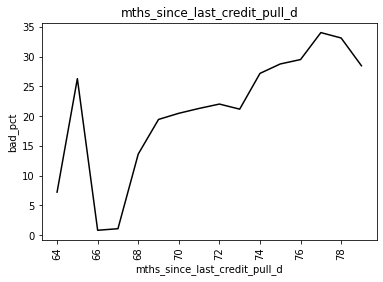

In [41]:
for cols in numeric:
    risk_pct_chart(cols)

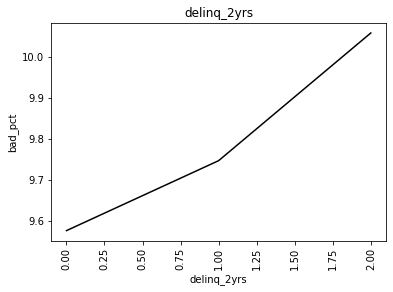

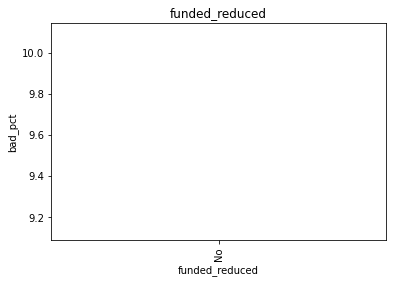

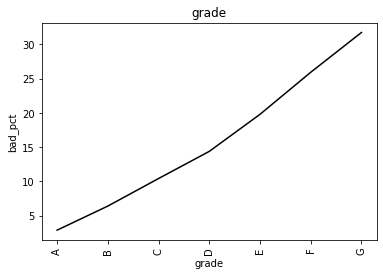

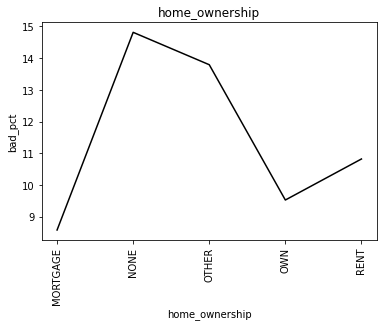

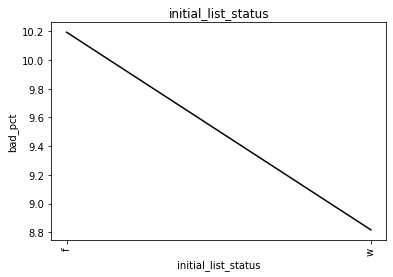

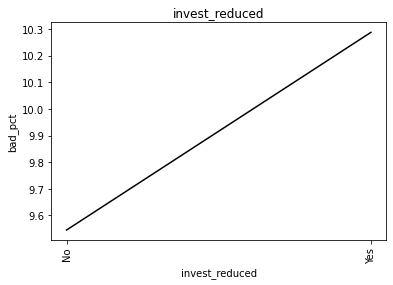

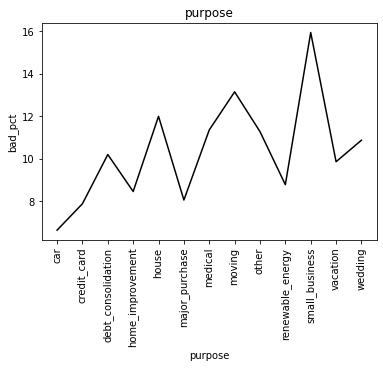

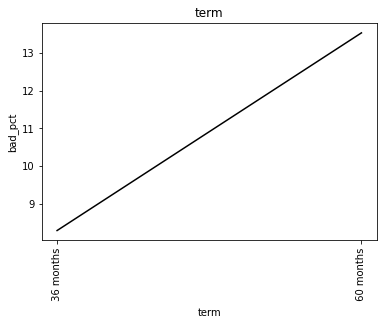

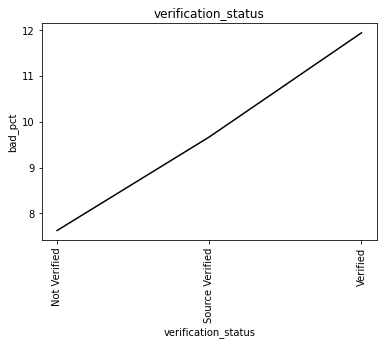

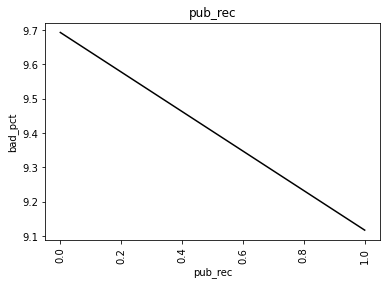

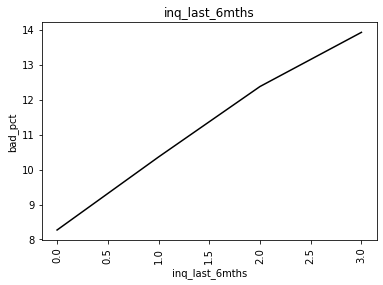

In [42]:
for cols in categorical:
    risk_pct_chart(cols)

Insight (Numeric) :
- Jarak waktu semenjak terakhir kali melakukan pembayaran memiliki tren positif terhadap persentase kredit buruk pada rentang waktu 65 – 80 bulan.
- Pada rentang waktu hingga 95 bulan semenjak kredit dikeluarkan, tren kredit buruk semakin banyak. Diatas rentang 95 bulan, justru tren kredit buruk menurun.
- Semakin banyak kredit aktif yang berjalan, persentase kredit yang buruk juga semakin meningkat.
- Pada rentang waktu diatas 68 bulan semenjak kredit terakhir diambil, persentase kredit buruk semakin banyak.



Insights (Categorical):
- Sistem grade kredit yang dimiliki memiliki performa yang baik, terlihat dari semakin rendah grade kredit, persentase kredit buruk semakin meningkat.
- Tenor kredit 60 bulan memiliki persentase kredit buruk yang lebih banyak dibandingkan tenor kredit 36 bulan.
- Jenis kepemilikan rumah yang tidak diketahui secara pasti, memiliki persentase kredit buruk yang lebih banyak dibandingkan yang diketahui kepemilikannya.
- Persentase kredit buruk paling tinggi digunakan untuk pendanaan bisnis kecil. Sedangkan pinjaman untuk pembelian mobil memiliki persentase kredit buruk paling rendah.
- Banyaknya permintaan kredit (tidak pendanaan hipotek dan kendaraan) selama 6 bulan terakhir memiliki persentase kredit buruk yang semakin banyak.
- Fractional loan memiliki persentase kredit buruk lebih banyak dibandingkan jenis whole loan.


# Data Preprocessing

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

## Feature Encoding

In [44]:
df_select.duplicated().sum()

8225

In [45]:
df_select.drop_duplicates(inplace=True)

In [46]:
df_select.credit_score.replace({"Bad":0,
                              "Good":1}, inplace=True)

In [47]:
onehot = ['funded_reduced', 'grade', 'home_ownership', 'initial_list_status',
       'invest_reduced', 'purpose', 'term', 'verification_status']

for i in onehot:
    onehots = pd.get_dummies(df_select[i], prefix=i)
    df_select = df_select.join(onehots)    
df_select = df_select.drop(columns=onehot, axis =1)

df_select.shape

(275634, 46)

**Label encoding untuk fitur target, one hot encoding untuk fitur independent.**

## Train Test Split

In [48]:
X = df_select.drop(columns=['credit_score'], axis=1)
y = df_select['credit_score']
print(X.shape)
print(y.shape)

(275634, 45)
(275634,)


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state = 42, 
                                                    stratify=y)

Memisahkan data training dan data testing dengan proporsi 80% : 20%.

## Feature Transform

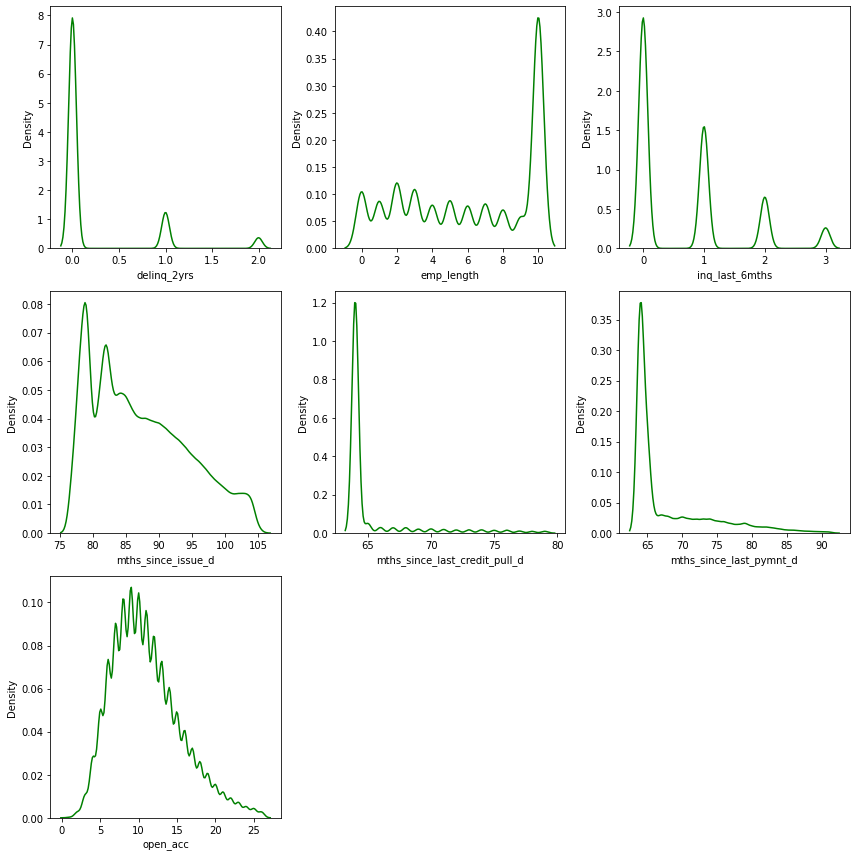

In [50]:
#Check Distribution
transform = ['delinq_2yrs','emp_length','inq_last_6mths',
      'mths_since_issue_d','mths_since_last_credit_pull_d',
      'mths_since_last_pymnt_d','open_acc']

plt.figure(figsize=(12,12))
for i in range(0, len(transform)):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(x=X_train[transform[i]], color='green')
    plt.tight_layout()

In [51]:
X_train.loc[:, transform] = np.log(X_train[transform]+1)
X_test.loc[:, transform] = np.log(X_test[transform]+1)

**Transformasi fitur untuk mengurangi skewness.**

## Feature Scalling

In [52]:
mms = MinMaxScaler()

X_train[transform] = mms.fit_transform(X_train[transform].values.reshape(len(X_train),7))
X_test[transform] = mms.fit_transform(X_test[transform].values.reshape(len(X_test),7))

**Melakukan standardisasi terhadap fitur numeric untuk permodelan.**

## Resampling

In [53]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train) #SMOTE

In [54]:
print('Training set: {}'.format(Counter(y_train)))
print('Trainin g set: {}'.format(Counter(y_smote)))

Training set: Counter({1: 198678, 0: 21829})
Trainin g set: Counter({0: 198678, 1: 198678})


**Melakukan resampling menggunakan SMOTE untuk membuat value pada target fitur menjadi seimbang.**

# Machine Learning Model

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from IPython.display import clear_output
from sklearn.inspection import plot_partial_dependence
import time
import shap

In [56]:
def eval_classification_smote(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_smote)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_smote)
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_smote, y_pred_train))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_smote, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_smote, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_smote, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_smote, y_pred_proba_train[:, 1]))
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

In [57]:
#Model Klasifikasi

clf_1 = LogisticRegression()
clf_2 = GaussianNB()
clf_3 = DecisionTreeClassifier(random_state=0)
clf_4 = RandomForestClassifier(random_state=0)
clf_5 = XGBClassifier(random_state=0)
clf_6 = CatBoostClassifier(random_state=0)

classifier_list = [clf_1,clf_2,clf_3,clf_4,clf_5,clf_6]

In [58]:
# Melakukan Thresholding Vanila Model

ml_model = []
score_accuracy = []
score_precision = []
score_recall = []
score_auc = []
time_training = []

for model in classifier_list:
    print(f"Processing {model.__class__.__name__}")
    
    start_time = time.time()
    
    #Define pipeline
    pipeline=Pipeline(steps=[("m", model)])
    
    # Evaluate model
    scoring=["accuracy","precision_macro","recall_macro","roc_auc"]
    
    scores = cross_validate(pipeline, 
                            X_smote, 
                            y_smote, 
                            scoring = scoring, 
                            n_jobs = -1)
    
    ml_model.append(model.__class__.__name__)
    score_accuracy.append(np.mean(scores["test_accuracy"]))
    score_precision.append(np.mean(scores["test_precision_macro"]))
    score_recall.append(np.mean(scores["test_recall_macro"]))
    score_auc.append(np.mean(scores["test_roc_auc"]))
    end_time = time.time()
    time_training.append(time.strftime('%H:%M:%S', time.gmtime(end_time - start_time)))
    
# Hasil
clear_output()
df_model = pd.DataFrame({"ML_Model":ml_model,
                         "Accuracy": score_accuracy,
                         "Precision": score_precision,
                         "Recall": score_recall,
                         "AUC": score_auc,
                         "Training_Time": time_training})
df_model.sort_values(["AUC"],ascending=False)

,ML_Model,Accuracy,Precision,Recall,AUC,Training_Time
3,RandomForestClassifier,0.949104,0.951807,0.949104,0.992881,00:04:28
5,CatBoostClassifier,0.934107,0.953856,0.934107,0.991725,00:06:49
4,XGBClassifier,0.899944,0.908645,0.899944,0.979330,00:02:58
2,DecisionTreeClassifier,0.922709,0.932796,0.922709,0.922843,00:00:17
0,LogisticRegression,0.805723,0.806265,0.805723,0.867811,00:00:34
1,GaussianNB,0.573249,0.656617,0.573250,0.763316,00:00:03


**Dua model terbaik adalah menggunakan Random Forest dan Cat Boost Classifier. Kedua model tersebut tidak jauh berbeda nilai evaluasi metricsnya. Model yang digunakan adalah Cat Boost Classifier, karena untuk menginterpretasinya membutuhkan komputasi dan waktu yang lebih singkat dibandingkan menggunakan Random Forest Classifier.**

## Select Best Model

In [59]:
clf = CatBoostClassifier(random_state=0)
model = clf.fit(X_smote, y_smote)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

Learning rate set to 0.132673
0:	learn: 0.5659164	total: 260ms	remaining: 4m 19s
1:	learn: 0.4926564	total: 462ms	remaining: 3m 50s
2:	learn: 0.4395877	total: 662ms	remaining: 3m 39s
3:	learn: 0.4051903	total: 867ms	remaining: 3m 35s
4:	learn: 0.3800667	total: 1.06s	remaining: 3m 30s
5:	learn: 0.3472842	total: 1.26s	remaining: 3m 29s
6:	learn: 0.3157115	total: 1.46s	remaining: 3m 27s
7:	learn: 0.2942702	total: 1.65s	remaining: 3m 24s
8:	learn: 0.2852039	total: 1.83s	remaining: 3m 21s
9:	learn: 0.2734841	total: 2.03s	remaining: 3m 21s
10:	learn: 0.2621235	total: 2.23s	remaining: 3m 20s
11:	learn: 0.2499758	total: 2.44s	remaining: 3m 21s
12:	learn: 0.2451837	total: 2.67s	remaining: 3m 22s
13:	learn: 0.2353714	total: 2.88s	remaining: 3m 22s
14:	learn: 0.2321615	total: 3.06s	remaining: 3m 20s
15:	learn: 0.2273678	total: 3.25s	remaining: 3m 20s
16:	learn: 0.2247340	total: 3.45s	remaining: 3m 19s
17:	learn: 0.2189178	total: 3.66s	remaining: 3m 19s
18:	learn: 0.2162745	total: 3.89s	remaining:

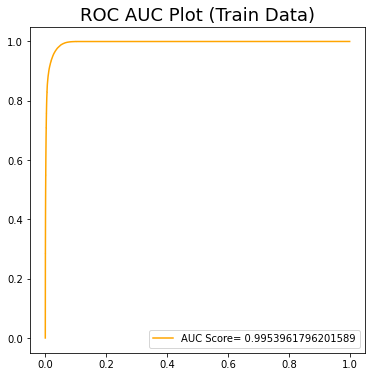

In [60]:
# ROC Plot

y_pred_proba = model.predict_proba(X_smote)[::,1]
fpr, tpr, _ = roc_curve(y_smote,  y_pred_proba)
auc = roc_auc_score(y_smote, y_pred_proba)
plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,label="AUC Score= "+str(auc),
         color = 'orange')
plt.title('ROC AUC Plot (Train Data)',
          fontsize=18)
plt.legend(loc=4)
plt.show()

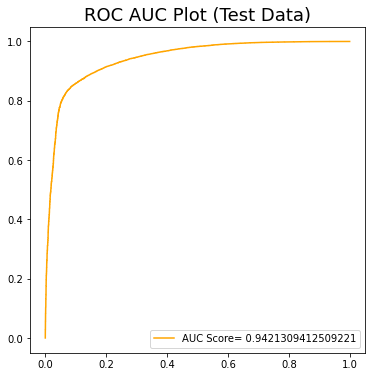

In [61]:
# ROC Plot
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,label="AUC Score= "+str(auc),
         color = 'orange')
plt.title('ROC AUC Plot (Test Data)',
          fontsize=18)
plt.legend(loc=4)
plt.show()

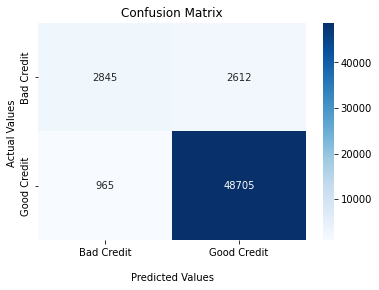

In [62]:
#Confusion Plot
y_pred = model.predict(X_test)
plot = confusion_matrix(y_test, y_pred)

#Plot
ax = sns.heatmap(plot, annot=True, cmap='Blues',fmt='g')
ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Bad Credit','Good Credit'])
ax.yaxis.set_ticklabels(['Bad Credit','Good Credit'])
## Display the visualization of the Confusion Matrix.
plt.show()

## SHAP

In [63]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

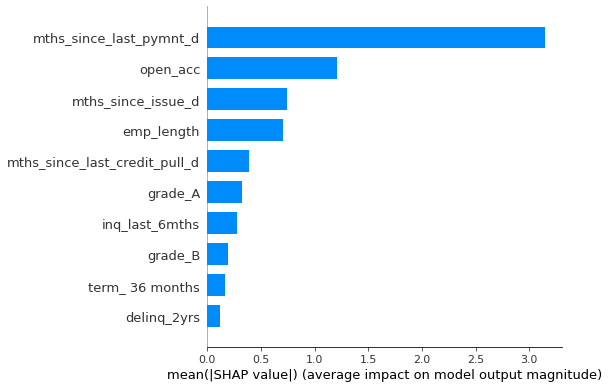

In [64]:
#Barplot
shap.summary_plot(shap_values, X_test.values, plot_type="bar", 
                  feature_names = X_test.columns, max_display=10)

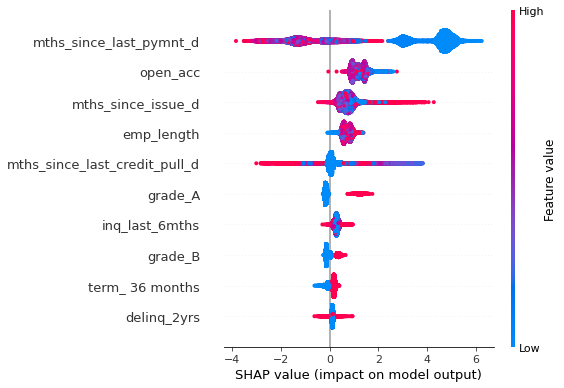

In [65]:
# Summary Plot
shap.summary_plot(shap_values, X_test, max_display=10)

Insights:
- Faktor yang paling berpengaruh kepada model adalah Months Since Last Payment Date atau lamanya waktu setelah pembayaran terakhir dalam bulan.
- Semakin jauh jarak waktu setelah pembayaran terakhir mengindikasikan kemungkinan kredit yang buruk.
- Jumlah akun kredit aktif yang rendah maka bisa berpeluang meningkatkan kredit menjadi baik, namun dalam sedikit kasus bisa mengindikasikan kredit yang buruk.
- Semakin lama waktu semenjak kredit diberikan (semakin mature sebuah kredit), meningkatkan peluang bahwa kredit menjadi baik
- Semakin lama pengalaman bekerja kreditur, semakin tinggi peluang kredit menjadi baik.
- Apabila kredit termasuk grade A berpeluang tinggi kredit tersebut merupakan kredit yang baik.


## Feature Importance

In [66]:
def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'Feature Importance Plot')
    plt.xlabel('Value')
    plt.ylabel('Independent Features')

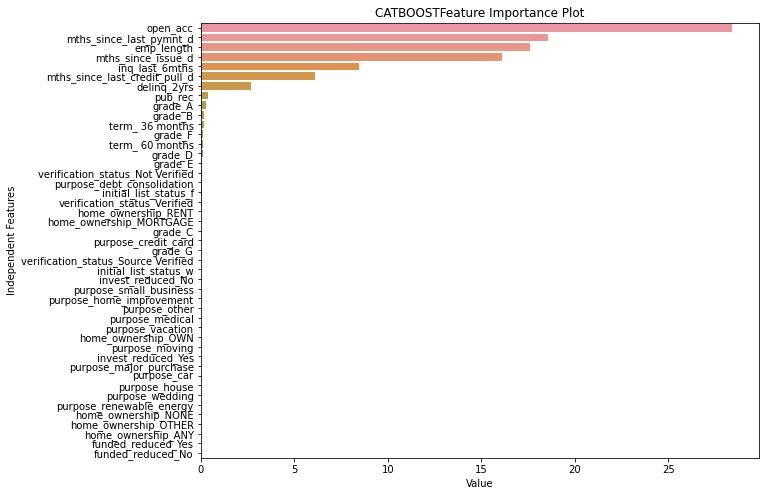

In [67]:
#Plot
plot_feature_importance(model.get_feature_importance(),X_test.columns,'CATBOOST')

Insights:

Empat fitur yang memiliki pengaruh signifikan kepada model adalah: **`Jumlah kredit aktif, waktu setelah pembayaran terakhir, lamanya bekerja, waktu setelah kredit didanai, dan banyaknya permintaan kredit dalam enam bulan terakhir.`** Selain fitur tersebut, menurut algoritma CatBoost, tidak terlalu berpengaruh atau menjadi fitur prediktif terhadap baik atau buruknya sebuah kredit.

## Partial Dependece Plot

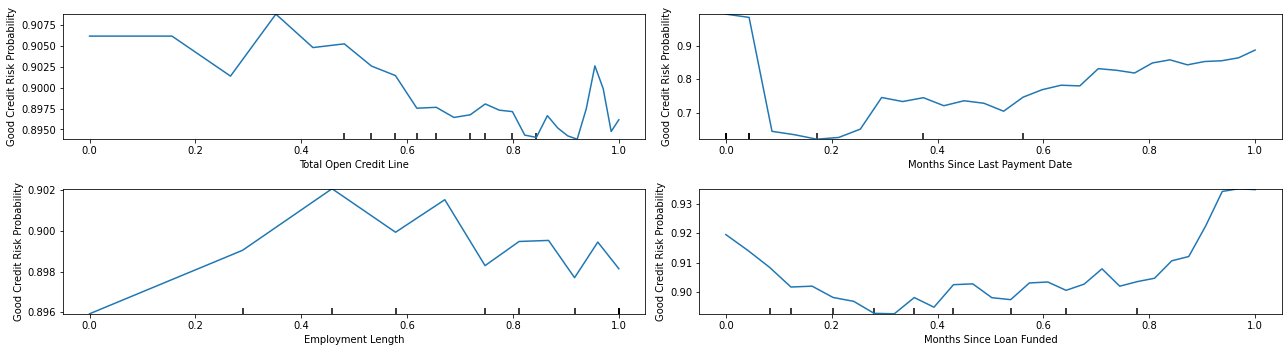

In [68]:
fig, ax = plt.subplots(2,2, figsize=(18, 5))
pdp1 = plot_partial_dependence(model, X_test,["mths_since_last_pymnt_d"], ax=ax[0,1])
pdp1.axes_[0,0].set_ylabel("Good Credit Risk Probability")
pdp1.axes_[0,0].set_xlabel("Months Since Last Payment Date")

pdp2 = plot_partial_dependence(model, X_test,["open_acc"], ax=ax[0,0])
pdp2.axes_[0,0].set_ylabel("Good Credit Risk Probability")
pdp2.axes_[0,0].set_xlabel("Total Open Credit Line")

pdp3 = plot_partial_dependence(model, X_test,['emp_length'], ax=ax[1,0])
pdp3.axes_[0,0].set_ylabel("Good Credit Risk Probability")
pdp3.axes_[0,0].set_xlabel("Employment Length")

pdp4 = plot_partial_dependence(model, X_test,['mths_since_issue_d'], ax=ax[1,1])
pdp4.axes_[0,0].set_ylabel("Good Credit Risk Probability")
pdp4.axes_[0,0].set_xlabel("Months Since Loan Funded")

plt.tight_layout()
plt.show()

Insights:
- Kemungkinan kredit lancar mengalami tren negative ketika jumlah kredit aktif kurang dari 18. Setelah kredit aktif lebih dari 18, kemungkinan kredit yang lancar semakin meningkat.
- Kemungkinan kredit lancar menurun drastis ketika waktu semenjak pembayaran terakhir berada di rentang waktu 65-70. Setelah lebih dari rentang waktu tersebut, kemungkinan kredit lancar mengalami tren meningkat
- Kemungkinan kredit lancar meningkat ketika lamanya bekerja ada di rentang 0 – 4 dan 9 – 10 tahun. Ketika lamanya bekerja berada di rentang waktu 4 – 9 tahun, kemungkinan kredit lancar menjadi menurun.
- Kemungkinan kredit lancar mengalami tren negative ketika waktu semenjak kredit didanai kurang dari 85. Setelah kredit didanai lebih dari 85 bulan, kemungkinan kredit lancar mengalami peningkatan, terutama di rentang 98 – 105.



# Credit

**Created by:**

Muhammad Chosasih Mahendra

mchosasih@gmail.com

linktr.ee/mchosasih

**Last Edited:**

18 July 2022